In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('../data/AADR.csv')
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-21,25.100000,25.100000,24.700001,24.700001,23.343714,42000
1,2010-07-22,25.420000,25.420000,25.129999,25.260000,23.872967,17500
2,2010-07-23,25.540001,25.540001,25.080000,25.280001,23.891865,8600
3,2010-07-26,25.400000,25.400000,25.219999,25.370001,23.976921,18900
4,2010-07-27,25.250000,25.290001,25.200001,25.290001,23.901318,8200


In [4]:
print(data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [5]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-21,25.100000,25.100000,24.700001,24.700001,23.343714,42000
2010-07-22,25.420000,25.420000,25.129999,25.260000,23.872967,17500
2010-07-23,25.540001,25.540001,25.080000,25.280001,23.891865,8600
2010-07-26,25.400000,25.400000,25.219999,25.370001,23.976921,18900
2010-07-27,25.250000,25.290001,25.200001,25.290001,23.901318,8200


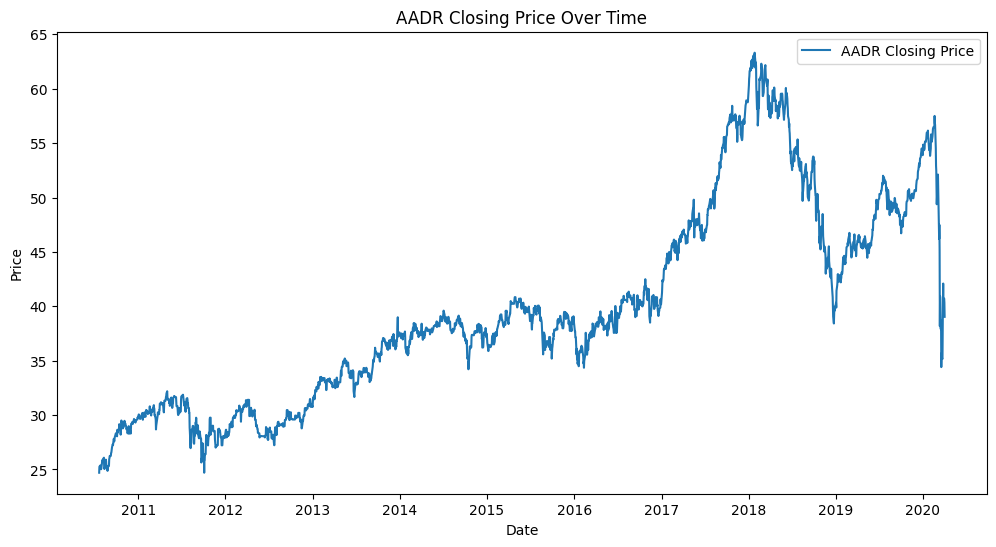

In [7]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='AADR Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AADR Closing Price Over Time')
plt.legend()
plt.show()

In [8]:
future_days = 30
data['Prediction'] = data['Close'].shift(-future_days)
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2020-03-26,41.200001,42.290001,41.200001,42.090000,42.090000,19600,NaN
2020-03-27,40.360001,40.500000,39.900002,40.419998,40.419998,6900,NaN
2020-03-30,40.549999,40.709999,39.970001,40.709999,40.709999,3000,NaN
2020-03-31,40.500000,41.230000,40.250000,40.340000,40.340000,4500,NaN
2020-04-01,39.169998,39.169998,38.599998,39.029999,39.029999,5700,NaN


In [9]:
X = np.array(data[['Close']][:-future_days])
y = np.array(data['Prediction'][:-future_days])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
confidence = lr.score(X_test, y_test)
print("Model confidence:", confidence)

Model confidence: 0.9195930099384028


In [13]:
X_future = np.array(data[['Close']][-future_days:])
forecast_prediction = lr.predict(X_future)

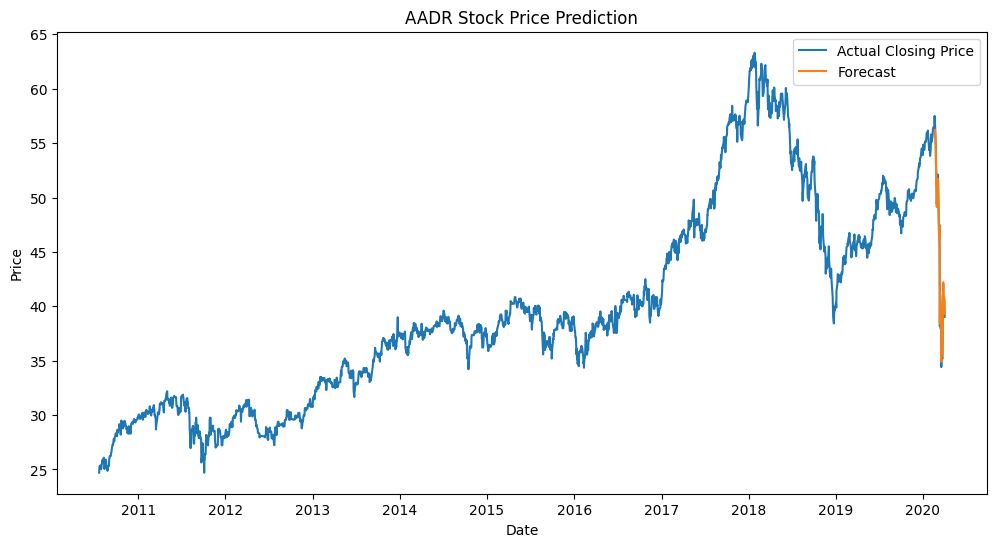

In [15]:
forecast_dates = data.index[-future_days:]

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Actual Closing Price')
plt.plot(forecast_dates, forecast_prediction, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AADR Stock Price Prediction')
plt.legend()
plt.show()